In [1]:
import numpy as np
import matplotlib.pyplot as plt
import csv
import sys
from sklearn.linear_model import LinearRegression

In [2]:
def data_pre() :
    X = []
    Y = []
    data_file = open("housing.csv")
    data_reader = csv.reader(data_file)
    tuple_count = 0
    for Tuple in data_reader :
        tuple_count += 1
        if(tuple_count != 1) :
            Y.append(float(Tuple[1]))
            data_tuple = [float(1)]
            for i in range(2, len(Tuple)) :
                if(Tuple[i] == "yes" or Tuple[i] == "no") :
                    if(Tuple[i] == "yes") :
                        data_tuple.append(float(1))
                    else :
                        data_tuple.append(float(0))
                else :
                    data_tuple.append(float(Tuple[i]))
            X.append(data_tuple)
    X = np.array(X)
    Y = np.array(Y)
    return X, Y

In [3]:
def CostLWR(X, Y, theta, W, lambda_reg):
    m = float(X.shape[0])
    sum_reg = (lambda_reg / (float(2) * m)) * np.sum(np.square(theta[1:]))
    return np.dot(np.dot(np.transpose(np.dot(X, theta) - Y), W), (np.dot(X, theta) - Y)) + sum_reg
def LWR_getWeights(X, var_input, BandLWR) :
    m = (X.shape[0])
    Weights = np.zeros((m, m))
    for i in range(m) :
        Weights[i][i] = np.exp(float(-1/2) * np.dot(np.transpose(X[i] - var_input), (X[i] - var_input)) / (BandLWR * BandLWR))
    return Weights
def LWR_init_theta(X) :
    return np.zeros(X.shape[1])
def graph_display(LWR_costs, LWR_iterations) :
    plt.plot(LWR_iterations, LWR_costs)
def Normal_LWR(X, W, Y) :
    term_reg=np.zeros((X.shape[1],X.shape[1]))
    for i in range(1,X.shape[1]) :
        term_reg[i][i]=lambda_reg
    LWR_val1 = np.linalg.inv(np.dot(np.dot(np.transpose(X), W), X)+term_reg)
    LWR_val2 = np.dot(np.dot(np.transpose(X), W), Y)
    return np.dot(LWR_val1, LWR_val2)
def Gradient_Descent_LWR(X, Y, theta, alpha, W, delta, lambda_reg) :
    LWR_costs = [CostLWR(X, Y, theta, W, lambda_reg)]
    LWR_iterations = [1]
    m = float(X.shape[0])
    LWR_iteration_count = 2
    while(True):
        term_reg = lambda_reg * theta
        term_reg[0] = 0
        theta = theta - (alpha / m) * (np.dot(np.dot(np.transpose(X), W), np.dot(X, theta) - Y) + term_reg)
        LWR_current_cost = CostLWR(X, Y, theta, W, lambda_reg)
        LWR_prev_cost = LWR_costs[LWR_iteration_count - 2]
        if(LWR_iteration_count % 100 == 0) :
            print(LWR_iteration_count, LWR_prev_cost, LWR_current_cost, LWR_prev_cost-LWR_current_cost)
        LWR_costs.append(LWR_current_cost)
        LWR_iterations.append(LWR_iteration_count)
        if(LWR_prev_cost - LWR_current_cost <= delta) :
            break
        LWR_iteration_count = LWR_iteration_count + 1
    print("Iterations Count: ",LWR_iteration_count)
    graph_display(LWR_costs, LWR_iterations)
    return theta

In [4]:
X, Y = data_pre()
theta = LWR_init_theta(X)
lambda_reg = 1e-22

In [5]:
alpha = 10000000000
delta = 1e-30
vals_std = np.std(X, axis=0)
vals_mean = np.mean(X, axis=0)
BandLWR = float(20 / 546)
var_input = [1, 4000,2 ,1 ,1 ,1 ,1 ,0 ,0 ,0 ,0 ,0]
for i in range(X.shape[0]) :
    for j in range(X.shape[1]) :
        if(vals_std[j] != 0) :
            X[i][j] = X[i][j] - vals_mean[j]
            X[i][j] = X[i][j] / vals_std[j]
for i in range(X.shape[1]): 
    if(vals_std[i] != 0) :
        var_input[i] = var_input[i] - vals_mean[i]
        var_input[i] = var_input[i] / vals_std[i]

In [6]:
W = LWR_getWeights(X, var_input, BandLWR)
Theta_LWR_Normal = Normal_LWR(X, W, Y)
print("Cost: ", CostLWR(X, Y, Theta_LWR_Normal, W, lambda_reg))
print("Theta values: ", Theta_LWR_Normal)
print("Value Predicted : ", np.dot(np.transpose(var_input), Theta_LWR_Normal))

Cost:  0.0014490362489622119
Theta values:  [ 3.379200e+04 -3.303125e+02 -1.280000e+02 -2.560000e+02  4.725000e+01
 -1.665000e+02  0.000000e+00  0.000000e+00 -1.275000e+01 -1.100000e+01
  0.000000e+00  6.400000e+01]
Value Predicted :  34144.29688021046


Iterations Count:  54
Cost:  9.060006210999761e-18
Theta values:  [ 3101.57188523 -2362.88555452 -4063.51498634 -1766.32905256
 -2888.0508516   1256.72655661  6672.96972752 -2275.01549192
  -679.41165693 -2112.27513615 -2495.29173226 -1716.32170698]
Value Predicted :  34454.59427890817


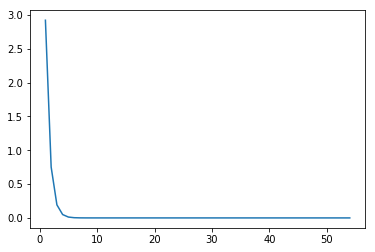

In [7]:
Theta_LWR = Gradient_Descent_LWR(X, Y, theta, alpha, W, delta, lambda_reg)
print("Cost: ", CostLWR(X, Y, Theta_LWR, W, lambda_reg))
print("Theta values: ", Theta_LWR)
print("Value Predicted : ", np.dot(np.transpose(var_input), Theta_LWR))